In [1]:
#Importamos las librerías necesarias para el proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Cargamos el dataset y se lo asignamos a una variable

iris = sns.load_dataset('iris')

In [3]:
#Creamos un objeto scaler para normalizar los datos
scaler = StandardScaler()

#Creamos una variable scaled que contenga los datos normalizados de las columnas de longitud y ancho de pétalo y sépalo
#Para ello llamamos al método fit_transform de scaler y le pasamos como parámetro las columnas que queremos normalizar

scaled = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


In [4]:
#Creamos una variable y le asignamos el resultado de hacer la covarianza de la variable scaled y la transpuesta de la misma
#Para ello llamamos al método cov de numpy y le pasamos como parámetro scaled y su transpuesta

matriz_covarianza = np.cov(scaled.T)

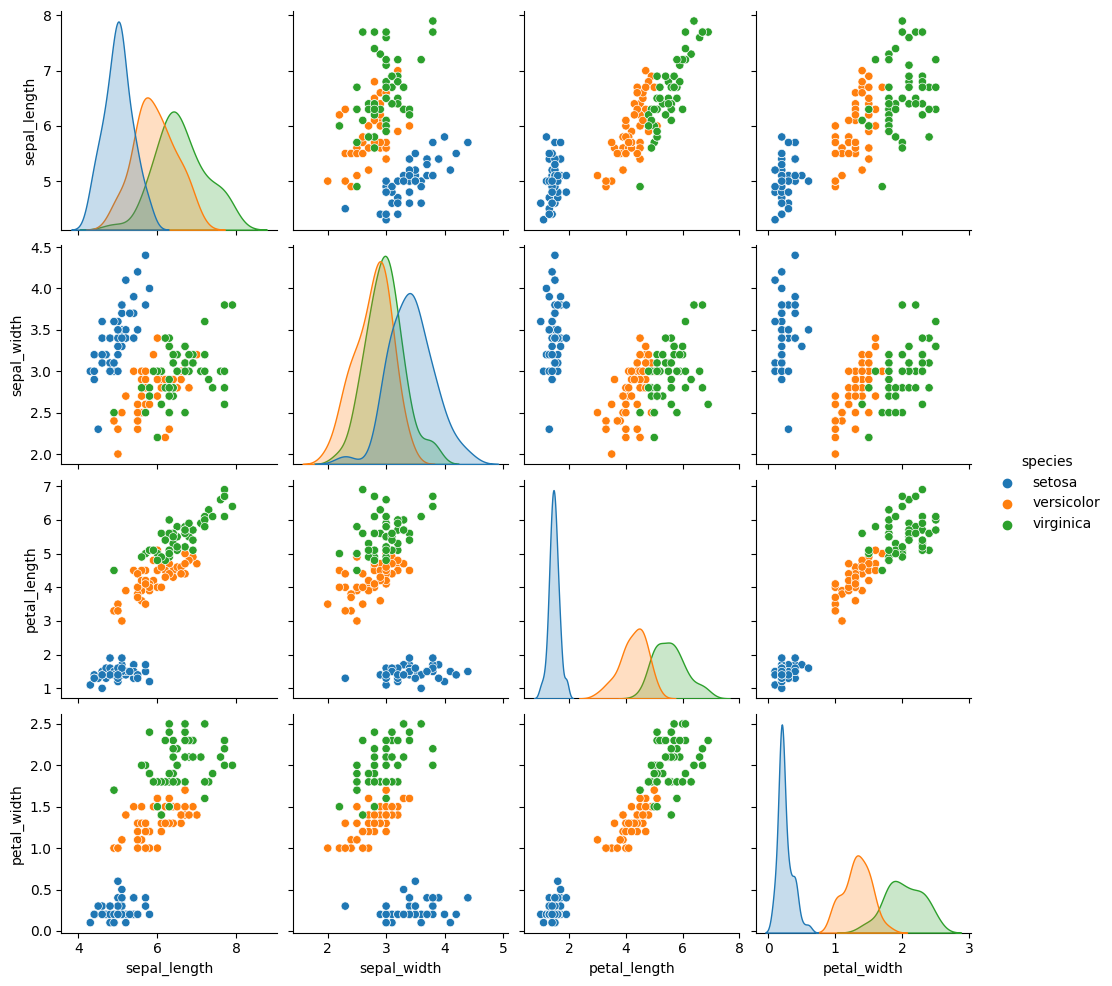

In [5]:
#Primero mostramos los gráficos de scatterplot de todas las combinaciones de longitud y ancho de pétalo y sépalo para poder hacernos una idea
#de las posibles relaciones que haya entre ellas

sns.pairplot(iris, hue='species')
plt.show()

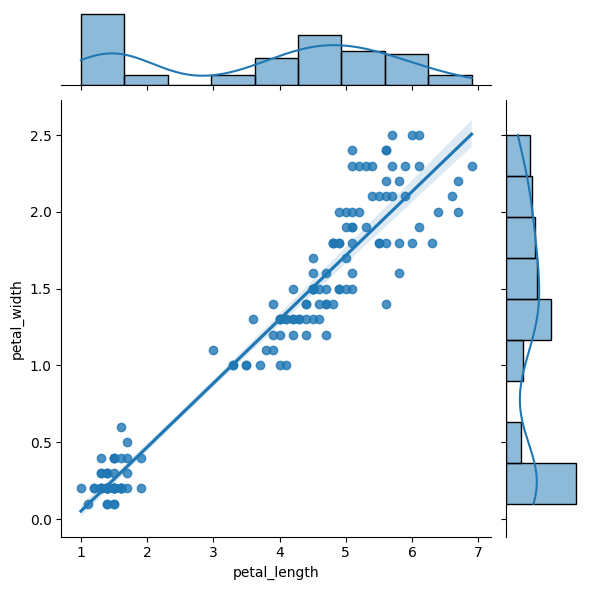

In [6]:
#Una vez que tenemos una idea de las relaciones que hay entre las variables, elegimos cuáles son las que nos interesan
#En este caso elegimos la longitud y ancho de pétalo

sns.jointplot(x='petal_length', y='petal_width', data=iris, kind='reg')

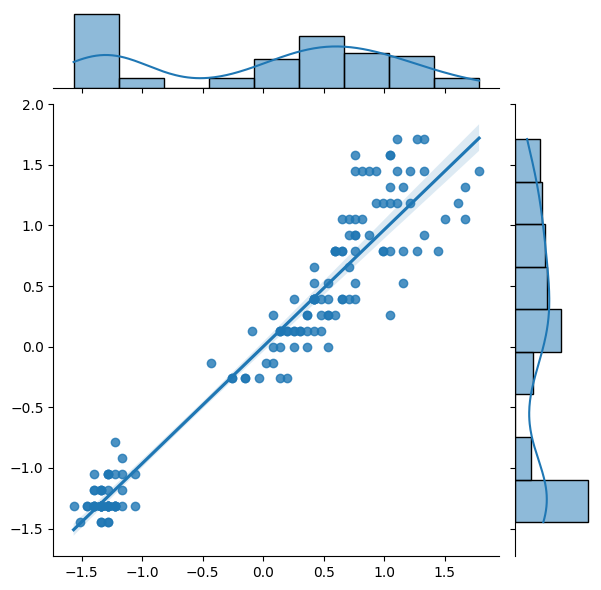

In [7]:
#Pero en realidad lo que queremos hacer es realizar una graficación de los datos que estén normalizados
#Para ello, creamos una nueva gráfica de jointplot con los datos normalizados, cogiendo sólo las columnas 2 y 3 y todas las filas que hay en estas

sns.jointplot(x=scaled[:,2], y=scaled[:,3], data=iris, kind='reg')
plt.show()

In [8]:
#Para seguir con el análisis, lo que vamos a hacer es obtener los valores propios y vectores propios de la matriz de covarianza
#Para ello, llamamos a la librería numpy, a su apartado de algebra lienal(linalg) y a su método eig(Palabra alemana que significa autovalor)

valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)

#Debemos de saber que los vectores propios son una de las direcciones principales de la varianza de los datos

In [9]:
#Vamos a recorrer todos los valores propios y vemos qué variante explican
#La variante explicada es el valor propio dividido entre la suma de todos los valores propios

#Vamos a crear una variable que contenga la suma de todos los valores propios

suma_valores_propios = sum(valores_propios)

#Vamos a crear una lista vacía que contendrá las variaciones explicadas

variaciones_explicadas = []

#Vamos a recorrer todos los valores propios y vamos a calcular la variante explicada de cada uno e ir añadiéndola a la lista variaciones_explicadas

for i in valores_propios:
    variaciones_explicadas.append(i/suma_valores_propios)

#Vamos a mostrar por pantalla las variaciones explicadas de cada valor propio
print(variaciones_explicadas)

[0.7296244541329987, 0.22850761786701773, 0.03668921889282877, 0.0051787091071548]


In [10]:
#Podemos ver que la primera variable explica el 72 % de la variación de los datos
#La segunda variable explica el 23 % de la variación de los datos
#La tercera variable explica el 3 % de la variación de los datos
#La cuarta variable explica el 1 % de la variación de los datos

#Ahora lo que queremos es quedarnos con los PCA que nos den una variación explicada mayor del 95 %
#Primero vamos a importar la librería PCA de sklearn

from sklearn.decomposition import PCA

#Creamos un objeto pca
#Para ello llamamos al método PCA de sklearn y le pasamos como parámetro el número de componentes que queremos que tenga, es decir
#estamos reduciendo la dimensionalidad de los datos de 4 a 2 cuando le pasamos n_components=2

pca = PCA(n_components=2)

#Ahora vamos a ajustar los datos a nuestro objeto pca, y le pasamos los datos normalizados
pca.fit(scaled)





PCA(n_components=2)

In [11]:
#Ahora lo que quiero es obtener los datos transformados, que tienen dos dimensiones y que proceden de los datos anteriores
#Creamos una variable que contenga los datos transformados
#Para ello llamamos al método transform de pca y le pasamos como parámetro los datos normalizados

datos_transformados = pca.transform(scaled)

In [12]:
#Para comparar los datos, lo que vamos a hacer es añadir al dataset iris una nueva columna que contenga los datos transofrmados
#Para ello, creamos una nueva columna en el dataset iris y le asignamos los datos transformados

iris['PCA1'] = datos_transformados[:,0]
iris['PCA2'] = datos_transformados[:,1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835


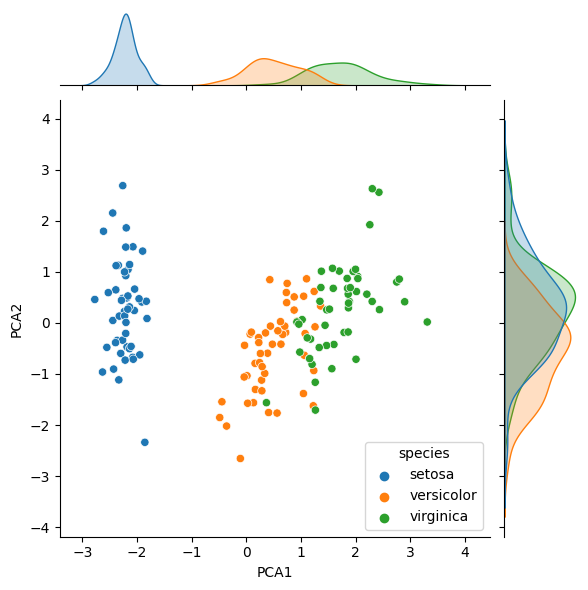

In [17]:
#Ya tenemos los datos transformados, podríamos pasarlos a un modelo de machine learnong para que aprenda a clasificarlos
#Pero antes de eso, vamos a ver cómo se distribuyen los datos en el plano

sns.jointplot(x='PCA1', y='PCA2', data=iris, hue='species')
plt.show()